In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [8]:
# Load your dataset
df = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\WMT.csv")

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.036447,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.036309,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.035895,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.035895,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.035343,870400


In [10]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
12486,2022-03-02,135.660004,136.830002,135.179993,136.160004,136.160004,7954600
12487,2022-03-03,137.289993,140.470001,136.550003,139.289993,139.289993,9961700
12488,2022-03-04,137.809998,142.940002,137.589996,142.820007,142.820007,11858800
12489,2022-03-07,141.300003,143.630005,140.449997,141.669998,141.669998,15273000
12490,2022-03-07,141.300003,143.630005,140.449997,141.669998,141.669998,14297959


In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,1.249100e+04
mean,35.479198,35.811310,35.151302,35.485380,28.948680,7.540560e+06
std,37.207071,37.519419,36.914186,37.214409,34.585375,6.237162e+06
min,0.015625,0.015625,0.014404,0.015625,0.008889,0.000000e+00
25%,1.386719,1.402344,1.375000,1.386719,0.858323,3.883600e+06
50%,16.437500,16.593750,16.250000,16.375000,10.588767,6.312800e+06
75%,56.395001,57.000000,55.664999,56.316250,40.920847,9.511400e+06
max,153.600006,153.660004,151.660004,152.789993,150.842651,1.318336e+08


In [14]:
df.shape

(12491, 7)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       12491 non-null  object 
 1   Open       12491 non-null  float64
 2   High       12491 non-null  float64
 3   Low        12491 non-null  float64
 4   Close      12491 non-null  float64
 5   Adj Close  12491 non-null  float64
 6   Volume     12491 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 683.2+ KB


In [18]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [22]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [23]:
df.duplicated().sum()

0

In [24]:
df.value_counts()

Date        Open        High        Low         Close       Adj Close   Volume  
1972-08-25  0.063477    0.064697    0.063477    0.064453    0.036447    2508800     1
2005-09-15  44.700001   44.799999   44.230000   44.320000   31.045322   18444400    1
2005-08-15  48.820000   49.150002   48.500000   49.099998   34.285172   10345200    1
2005-08-16  48.060001   48.200001   47.150002   47.570000   33.216824   29758300    1
2005-08-17  47.310001   47.610001   47.110001   47.110001   32.999672   11811600    1
                                                                                   ..
1989-02-23  4.093750    4.125000    4.046875    4.093750    2.584846    5244800     1
1989-02-24  4.078125    4.109375    3.968750    4.000000    2.525651    5100800     1
1989-02-27  3.968750    4.031250    3.953125    4.000000    2.525651    3639200     1
1989-02-28  4.000000    4.015625    3.953125    3.984375    2.515786    4019200     1
2022-03-07  141.300003  143.630005  140.449997  141.669998 

In [25]:
df.all()

Date          True
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume       False
dtype: bool

In [26]:
# Extract the 'Close' prices
df = df[['Close']]
dataset = df.values

# Normalize the dataset
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

# Split the data into training and testing sets
train_size = int(len(dataset) * 0.8)
train_data, test_data = dataset[:train_size], dataset[train_size:]


In [27]:
def create_sequences(df, seq_length):
    sequences = []
    for i in range(len(df) - seq_length):
        sequences.append(df[i:i + seq_length])
    return np.array(sequences)

seq_length = 10
X_train = create_sequences(train_data, seq_length)
y_train = train_data[seq_length:]

X_test = create_sequences(test_data, seq_length)
y_test = test_data[seq_length:]


# Build and train the LSTM model:

In [28]:
model = Sequential()
model.add(LSTM(50, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
312/312 [==============================] - 3s 5ms/step - loss: 9.9753e-04
Epoch 2/50
312/312 [==============================] - 2s 5ms/step - loss: 3.9053e-05
Epoch 3/50
312/312 [==============================] - 2s 5ms/step - loss: 3.8438e-05
Epoch 4/50
312/312 [==============================] - 2s 5ms/step - loss: 3.5707e-05
Epoch 5/50
312/312 [==============================] - 2s 6ms/step - loss: 3.8083e-05
Epoch 6/50
312/312 [==============================] - 2s 5ms/step - loss: 3.5924e-05
Epoch 7/50
312/312 [==============================] - 2s 6ms/step - loss: 3.6279e-05
Epoch 8/50
312/312 [==============================] - 2s 7ms/step - loss: 3.3412e-05
Epoch 9/50
312/312 [==============================] - 2s 7ms/step - loss: 3.2508e-05
Epoch 10/50
312/312 [==============================] - 2s 8ms/step - loss: 3.0309e-05
Epoch 11/50
312/312 [==============================] - 2s 5ms/step - loss: 2.9757e-05
Epoch 12/50
312/312 [==============================] - 2s 6ms/s

In [30]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

78/78 [==============================] - 0s 2ms/step


In [32]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 215960491.97


In [34]:
# Use the last part of the test data for making future predictions
future_data = test_data[-seq_length:]

# Number of days to predict into the future
days_to_predict = 5
predicted_prices = []

for i in range(days_to_predict):
    # Reshape the input for the model
    input_data = future_data[-seq_length:]
    input_data = np.reshape(input_data, (1, seq_length, 1))

    # Make a prediction for the next day
    next_day_price = model.predict(input_data)
    
    # Inverse transform the predicted price
    next_day_price = scaler.inverse_transform(next_day_price)

    # Append the prediction to the list of predicted prices
    predicted_prices.append(next_day_price[0, 0])

    # Update the input data for the next iteration
    future_data = np.append(future_data, next_day_price, axis=0)

# Print the predicted prices for the next 5 days
print("Predicted Prices for the Next 5 Days:")
for i, price in enumerate(predicted_prices):
    print(f"Day {i+1}: {price:.2f}")


1/1 [==============================] - 0s 19ms/step
Predicted Prices for the Next 5 Days:
Day 1: 135.09
Day 2: 973.73
Day 3: 1057.18
Day 4: 1068.28
Day 5: 1069.32


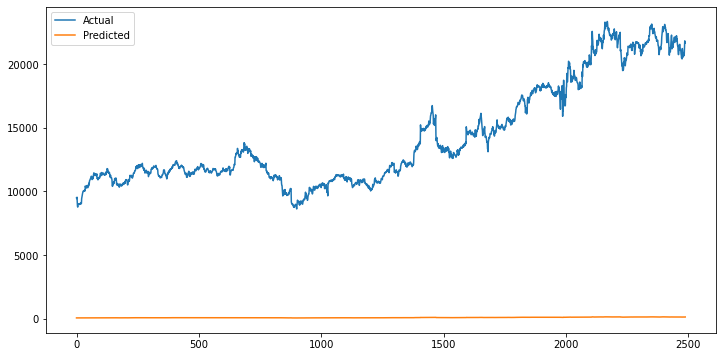

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


In [38]:
# <div class="alert alert-success" style="color:blue;">This is a comment in blue.</div>
# <div class="alert alert-warning" style="color:orange;">This is a comment in orange.</div>
# <div class="alert alert-danger" style="color:red;">This is a comment in red.</div>


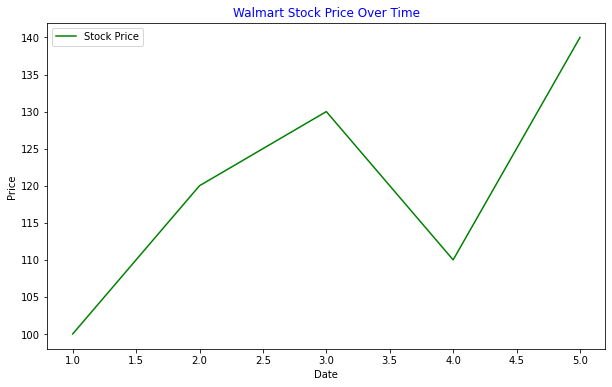

In [43]:
import matplotlib.pyplot as plt

# Replace 'x' and 'y' with your actual data
x = [1, 2, 3, 4, 5]
y = [100, 120, 130, 110, 140]

# Create a colorful plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='green', label='Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Walmart Stock Price Over Time', color='blue')
plt.legend()
plt.show()
